In [2]:
import torch 
from torch import nn
from torch.nn import functional as F
net = nn.Sequential(nn.Linear(20,256), nn.ReLU(), nn.Linear(256,10))
X = torch.rand(2,20)
net(X)

tensor([[ 0.3451,  0.0492, -0.2839,  0.1049, -0.1657,  0.1516,  0.0053,  0.1232,
          0.2353,  0.2135],
        [ 0.3234,  0.1033, -0.2864,  0.0153, -0.1712,  0.2587, -0.1411,  0.0111,
          0.3406,  0.3362]], grad_fn=<AddmmBackward0>)

In [6]:
# 任何一个层或者一个神经网络 都应该是module的子类
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(20,256)
        self.out = nn.Linear(256,10)
    def forward(self, X):
        return self.out(F.relu(self.hidden(X)))

In [7]:
net = MLP()
net(X)

tensor([[ 0.1044, -0.1224,  0.1959,  0.1308, -0.0707, -0.0785, -0.0604, -0.0400,
         -0.0577,  0.2133],
        [ 0.1693, -0.1444,  0.2287,  0.2295,  0.0013, -0.0376, -0.0467,  0.0214,
         -0.0778,  0.1387]], grad_fn=<AddmmBackward0>)

In [13]:
a = dict((('a','b'),(1,2)))
for i in a:
    print(i)   # 输出的是键

a
1


In [14]:
a.values()

dict_values(['b', 2])

In [15]:
a.keys()

dict_keys(['a', 1])

In [18]:
for i in a.items():
    print(i)

('a', 'b')
(1, 2)


In [20]:
class MySequential(nn.Module):
    def __init__(self, *args):
        super().__init__()
        for block in args:
            self._modules[block] = block

    def forward(self, X):  # forward函数是给对象接受输入的
        for block in self._modules.values():
            X = block(X)
        return X

net = MySequential(nn.Linear(20,256),nn.ReLU(),nn.Linear(256,10))
net(X)

tensor([[-0.0127, -0.2329, -0.2860,  0.1833, -0.2839,  0.0768, -0.0699, -0.1223,
          0.1856, -0.2204],
        [-0.1633, -0.1940, -0.2852,  0.2080, -0.3823,  0.1895, -0.1256, -0.2006,
          0.1354, -0.3245]], grad_fn=<AddmmBackward0>)

In [25]:
MLP.__dict__

mappingproxy({'__module__': '__main__',
              '__init__': <function __main__.MLP.__init__(self)>,
              'forward': <function __main__.MLP.forward(self, X)>,
              '__doc__': None})

In [26]:
net.__dict__

{'training': True,
 '_parameters': OrderedDict(),
 '_buffers': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_backward_pre_hooks': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_hooks_with_kwargs': OrderedDict(),
 '_forward_hooks_always_called': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_forward_pre_hooks_with_kwargs': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': OrderedDict([(Linear(in_features=20, out_features=256, bias=True),
               Linear(in_features=20, out_features=256, bias=True)),
              (ReLU(), ReLU()),
              (Linear(in_features=256, out_features=10, bias=True),
               Linear(in_features=256, out_features=10, bias=True))])}

In [27]:
net._modules

OrderedDict([(Linear(in_features=20, out_features=256, bias=True),
              Linear(in_features=20, out_features=256, bias=True)),
             (ReLU(), ReLU()),
             (Linear(in_features=256, out_features=10, bias=True),
              Linear(in_features=256, out_features=10, bias=True))])

In [29]:
dir(MLP)  # 有什么方法

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_call_impl',
 '_compiled_call_impl',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_load_from_state_dict',
 '_maybe_warn_non_full_backward_hook',
 '_named_members',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_version',
 '_wrapped_call_impl',
 'add_module',
 'apply',
 'bfloat16',
 'buffers',
 'call_super_init',
 'children',
 'compile',
 'cpu',
 'cuda',
 'double',
 'dump_patches',
 'eval',


In [30]:
net.__dict__  # 看有哪些属性

{'training': True,
 '_parameters': OrderedDict(),
 '_buffers': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_backward_pre_hooks': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_hooks_with_kwargs': OrderedDict(),
 '_forward_hooks_always_called': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_forward_pre_hooks_with_kwargs': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': OrderedDict([(Linear(in_features=20, out_features=256, bias=True),
               Linear(in_features=20, out_features=256, bias=True)),
              (ReLU(), ReLU()),
              (Linear(in_features=256, out_features=10, bias=True),
               Linear(in_features=256, out_features=10, bias=True))])}

In [33]:
class FixedHiddenMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.rand_weight = torch.rand(20,20,requires_grad = False)
        self.linear = nn.Linear(20, 20)

    def forward(self, X):  # 只是说forward可以干任何想干的事
        X = self.linear(X)
        # X = F.relu(torch.matmul(X,self.rand_weight)+1)
        X = F.relu(X@self.rand_weight+1)
        X = self.linear(X)
        while X.abs().sum() >1:
            X/=2
        return X.sum()

net = FixedHiddenMLP()
net(X)

tensor(-0.1198, grad_fn=<SumBackward0>)

In [34]:
class NestMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Linear(20, 64), nn.ReLU(),
                                 nn.Linear(64, 32), nn.ReLU())
        self.linear = nn.Linear(32, 16)

    def forward(self, X):
        return self.linear(self.net(X))

chimera = nn.Sequential(NestMLP(), nn.Linear(16, 20), FixedHiddenMLP()) # 混合组合多个模块
chimera(X)

tensor(0.1714, grad_fn=<SumBackward0>)

### 参数管理


In [35]:
import torch
from torch import nn

net = nn.Sequential(nn.Linear(4,8), nn.ReLU(),nn.Linear(8,1))
X = torch.rand(size=(2,4))
net(X)

tensor([[ 0.0166],
        [-0.0258]], grad_fn=<AddmmBackward0>)

In [36]:
print(net[2].state_dict())

OrderedDict([('weight', tensor([[-0.0644, -0.0345, -0.2651,  0.3273,  0.2900, -0.1832, -0.2884,  0.1575]])), ('bias', tensor([-0.1296]))])


In [41]:
[*net[2].parameters()]

[Parameter containing:
 tensor([[-0.0644, -0.0345, -0.2651,  0.3273,  0.2900, -0.1832, -0.2884,  0.1575]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.1296], requires_grad=True)]

In [42]:
print(type(net[2].bias))
print(net[2].bias)
print(net[2].bias.data)

<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([-0.1296], requires_grad=True)
tensor([-0.1296])


In [43]:
net[2].weight.grad == None

True

In [44]:
print(*[(name, param.shape) for name, param in net[0].named_parameters()])
print(*[(name, param.shape) for name, param in net.named_parameters()])

('weight', torch.Size([8, 4])) ('bias', torch.Size([8]))
('0.weight', torch.Size([8, 4])) ('0.bias', torch.Size([8])) ('2.weight', torch.Size([1, 8])) ('2.bias', torch.Size([1]))


In [55]:
[*net[2].named_parameters()]# 比parameters多一个name

[('weight',
  Parameter containing:
  tensor([[-0.0644, -0.0345, -0.2651,  0.3273,  0.2900, -0.1832, -0.2884,  0.1575]],
         requires_grad=True)),
 ('bias',
  Parameter containing:
  tensor([-0.1296], requires_grad=True))]

In [56]:
[(name, param.shape) for name, param in net.named_parameters()]

[('0.weight', torch.Size([8, 4])),
 ('0.bias', torch.Size([8])),
 ('2.weight', torch.Size([1, 8])),
 ('2.bias', torch.Size([1]))]

In [60]:
print(*[(name, param.shape) for name, param in net.named_parameters()]) 
#将里面的东西都解包成一个个变量

('0.weight', torch.Size([8, 4])) ('0.bias', torch.Size([8])) ('2.weight', torch.Size([1, 8])) ('2.bias', torch.Size([1]))


In [59]:
print([(name, param.shape) for name, param in net.named_parameters()])

[('0.weight', torch.Size([8, 4])), ('0.bias', torch.Size([8])), ('2.weight', torch.Size([1, 8])), ('2.bias', torch.Size([1]))]


In [62]:

net.state_dict(),net.state_dict()['2.bias'].data

(OrderedDict([('0.weight',
               tensor([[ 0.0557,  0.3907, -0.3373,  0.4354],
                       [ 0.4789,  0.0959, -0.3615,  0.3592],
                       [ 0.0437,  0.0464,  0.0334,  0.4462],
                       [-0.0885, -0.2031, -0.0232,  0.0267],
                       [-0.2160,  0.4516, -0.1968, -0.1826],
                       [-0.4440,  0.2141,  0.1186,  0.4145],
                       [ 0.2778, -0.3258,  0.2207,  0.0341],
                       [ 0.4149,  0.4684,  0.4138,  0.1345]])),
              ('0.bias',
               tensor([ 0.1286, -0.3458, -0.2369, -0.3649,  0.1066, -0.2706, -0.3156,  0.1025])),
              ('2.weight',
               tensor([[-0.0644, -0.0345, -0.2651,  0.3273,  0.2900, -0.1832, -0.2884,  0.1575]])),
              ('2.bias', tensor([-0.1296]))]),
 tensor([-0.1296]))

In [64]:
[*net.parameters()] # 没有名字

[Parameter containing:
 tensor([[ 0.0557,  0.3907, -0.3373,  0.4354],
         [ 0.4789,  0.0959, -0.3615,  0.3592],
         [ 0.0437,  0.0464,  0.0334,  0.4462],
         [-0.0885, -0.2031, -0.0232,  0.0267],
         [-0.2160,  0.4516, -0.1968, -0.1826],
         [-0.4440,  0.2141,  0.1186,  0.4145],
         [ 0.2778, -0.3258,  0.2207,  0.0341],
         [ 0.4149,  0.4684,  0.4138,  0.1345]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1286, -0.3458, -0.2369, -0.3649,  0.1066, -0.2706, -0.3156,  0.1025],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.0644, -0.0345, -0.2651,  0.3273,  0.2900, -0.1832, -0.2884,  0.1575]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.1296], requires_grad=True)]

In [66]:
def block1():
    return nn.Sequential(nn.Linear(4,8),nn.ReLU(),nn.Linear(8,4), nn.ReLU())

def block2():
    net  = nn.Sequential()
    for i in range(4):
        net.add_module(f'block{i}', block1())
    return net

rgnet = nn.Sequential(block2(),nn.Linear(4,1))
rgnet(X)

tensor([[-0.1086],
        [-0.1086]], grad_fn=<AddmmBackward0>)

In [67]:
print(rgnet)

Sequential(
  (0): Sequential(
    (block0): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block1): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block2): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block3): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
  )
  (1): Linear(in_features=4, out_features=1, bias=True)
)


In [71]:
def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, mean=0, std=0.01)
        nn.init.zeros_(m.bias)

net.apply(init_normal) #对一层自动遍历这个函数
net[0].weight.data[0], net[0].bias.data[0]

(tensor([ 0.0272,  0.0296, -0.0003,  0.0065]), tensor(0.))

In [73]:
def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight,1)
        nn.init.zeros_(m.bias)

net.apply(init_normal) #对一层自动遍历这个函数
net[0].weight.data[0], net[0].bias.data[0]
# 全部初始化为同一个值，会导致：除输入层以外其它层的各个神经单元输入输出一样，状态梯度一样，
# 从而权重的梯度更新也一样，等价于每层只有一个单元，

(tensor([1., 1., 1., 1.]), tensor(0.))

In [74]:
def init_xavier(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
def init_42(m):
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight, 42)

net[0].apply(init_xavier)
net[2].apply(init_42)
print(net[0].weight.data[0])
print(net[2].weight.data)

tensor([ 0.4612, -0.5349, -0.0415, -0.2564])
tensor([[42., 42., 42., 42., 42., 42., 42., 42.]])


In [75]:
def my_init(m):
    if type(m) == nn.Linear:
        print("Init", *[(name, param.shape)
                        for name, param in m.named_parameters()][0])
        nn.init.uniform_(m.weight, -10, 10)
        m.weight.data *= m.weight.data.abs() >= 5  # 绝对值小于5就变成0 否则保留

net.apply(my_init)
net[0].weight[:2]

Init weight torch.Size([8, 4])
Init weight torch.Size([1, 8])


tensor([[0.0000, 8.0918, -0.0000, -0.0000],
        [7.4810, 7.3972, -0.0000, 8.8085]], grad_fn=<SliceBackward0>)

In [76]:
# 注意，我们始终可以直接设置参数。
net[0].weight.data[:] += 1
net[0].weight.data[0, 0] = 42
net[0].weight.data[0]

tensor([42.0000,  9.0918,  1.0000,  1.0000])

In [81]:
net[0].weight.data.normal_(0,1) ,net[0].weight.data  # 也可以这样更改
# nn.init.normal_(net[0].weight,0,1)

(tensor([[ 0.0687, -1.1408, -0.7929,  0.2610],
         [ 0.0165,  0.3042,  1.2197,  0.1810],
         [-0.7352, -1.5654, -0.9055, -0.7527],
         [-0.7778, -0.1484,  0.6233, -0.5090],
         [-0.8987,  1.0626,  0.3558,  0.2178],
         [-0.3177, -2.2064, -0.9545, -1.3707],
         [ 1.8010,  0.1715, -0.3414,  1.3554],
         [ 0.1920, -0.0933, -0.1296, -0.1949]]),
 tensor([[ 0.0687, -1.1408, -0.7929,  0.2610],
         [ 0.0165,  0.3042,  1.2197,  0.1810],
         [-0.7352, -1.5654, -0.9055, -0.7527],
         [-0.7778, -0.1484,  0.6233, -0.5090],
         [-0.8987,  1.0626,  0.3558,  0.2178],
         [-0.3177, -2.2064, -0.9545, -1.3707],
         [ 1.8010,  0.1715, -0.3414,  1.3554],
         [ 0.1920, -0.0933, -0.1296, -0.1949]]))

In [77]:
# 我们需要给共享层一个名称，以便可以引用它的参数
shared = nn.Linear(8, 8)
net = nn.Sequential(nn.Linear(4, 8), nn.ReLU(),
                    shared, nn.ReLU(),
                    shared, nn.ReLU(),
                    nn.Linear(8, 1))
net(X)
# 检查参数是否相同
print(net[2].weight.data[0] == net[4].weight.data[0])
net[2].weight.data[0, 0] = 100
# 确保它们实际上是同一个对象，而不只是有相同的值
print(net[2].weight.data[0] == net[4].weight.data[0])

''' 
共享参数通常可以节省内存，并在以下方面具有特定的好处：
对于图像识别中的CNN，共享参数使网络能够在图像中的任何地方而不是仅在某个区域中查找给定的功能。
对于RNN，它在序列的各个时间步之间共享参数，因此可以很好地推广到不同序列长度的示例。
对于自动编码器，编码器和解码器共享参数。 在具有线性激活的单层自动编码器中，共享权重会在权重矩阵的不同隐藏层之间强制正交。
'''

tensor([True, True, True, True, True, True, True, True])
tensor([True, True, True, True, True, True, True, True])


### 自定义层


In [82]:
import torch 
import torch.nn.functional as F
from torch import nn

class CenteredLayer(nn.Module):
    def __init__(self):
        super().__init__()  # 可以直接不定义这个函数 py3中会自动调用的
    def forward(self, X):
        return X-X.mean()

layer = CenteredLayer()

In [85]:
layer(torch.arange(1,6,dtype=torch.float32))

tensor([-2., -1.,  0.,  1.,  2.])

In [86]:
net = nn.Sequential(nn.Linear(8, 128), CenteredLayer())
Y = net(torch.rand(4,8))
Y.mean()

tensor(1.8626e-09, grad_fn=<MeanBackward0>)

In [88]:
nn.Parameter(torch.randn(5,3))

Parameter containing:
tensor([[-1.2853,  0.0555,  0.8243],
        [ 0.2901, -1.2892, -0.9273],
        [ 0.4108,  0.6037,  1.3619],
        [ 0.0148,  1.7332, -0.1700],
        [ 0.4948,  0.0480, -0.3171]], requires_grad=True)

In [92]:
torch.randn(5,requires_grad=True)

tensor([ 1.2488,  0.6782,  0.6710, -1.6186, -0.4910], requires_grad=True)

In [91]:
torch.randn((5,),requires_grad=True)

tensor([-0.8042, -0.1902,  2.3154,  0.0278,  0.9047], requires_grad=True)

In [117]:
class MyLinear(nn.Module):
    def __init__(self, in_units, units):
        super().__init__()
        self.weight = torch.randn((in_units,units),requires_grad = True)
        self.bias = torch.randn((units,),requires_grad = True) # 就是一行units列

    def forward(self, X):
        return F.relu(torch.matmul(X,self.weight) + self.bias)

# nn.ReLU(torch.matmul(X,self.weight) + self.bias)
# Boolean value of Tensor with more than one value is ambiguous的报错

In [118]:
linear = MyLinear(5, 3)
linear.weight

tensor([[-1.1126,  1.1513, -0.5278],
        [ 0.6235,  0.3394, -0.4936],
        [-0.6241,  0.2524, -0.0908],
        [ 2.2613,  0.8774,  3.3027],
        [ 1.8140,  1.1591, -0.1443]], requires_grad=True)

In [119]:
X = torch.randn(5)
linear(X)

tensor([0.0000, 1.5939, 2.0022], grad_fn=<ReluBackward0>)

In [120]:
class MyLinear_(nn.Module):
    def __init__(self, in_units, units):
        super().__init__()
        self.weight = nn.Parameter(torch.randn((in_units,units))) # nn.Parameter会自动加一个梯度
        self.bias = nn.Parameter(torch.randn((units,))) # 就是一行units列

    def forward(self, X):
        return F.relu(torch.matmul(X,self.weight) + self.bias)

In [122]:
linear_ = MyLinear_(5, 3)
linear.weight

tensor([[-1.1126,  1.1513, -0.5278],
        [ 0.6235,  0.3394, -0.4936],
        [-0.6241,  0.2524, -0.0908],
        [ 2.2613,  0.8774,  3.3027],
        [ 1.8140,  1.1591, -0.1443]], requires_grad=True)

In [123]:
X = torch.randn(5)
linear(X)

tensor([4.7172, 4.5358, 0.0000], grad_fn=<ReluBackward0>)

In [124]:
linear(torch.rand(2, 5))

tensor([[2.6997, 2.9224, 0.0000],
        [2.5380, 3.5694, 1.4592]], grad_fn=<ReluBackward0>)

In [125]:
net = nn.Sequential(MyLinear(64, 8), MyLinear(8, 1))
net(torch.rand(2, 64))

tensor([[0.4369],
        [0.0000]], grad_fn=<ReluBackward0>)

### 读写文件

In [126]:
import torch
from torch import nn
from torch.nn import functional as F

x = torch.arange(4)
torch.save(x, 'x-file')

In [127]:
x2 = torch.load('x-file')
x2

tensor([0, 1, 2, 3])

In [128]:
y = torch.zeros(4)
torch.save([x, y],'x-files')
x2, y2 = torch.load('x-files')
(x2, y2)

(tensor([0, 1, 2, 3]), tensor([0., 0., 0., 0.]))

In [129]:
mydict = {'x': x, 'y': y}
torch.save(mydict, 'mydict')
mydict2 = torch.load('mydict')
mydict2

{'x': tensor([0, 1, 2, 3]), 'y': tensor([0., 0., 0., 0.])}

In [130]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(20, 256)
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        return self.output(F.relu(self.hidden(x)))

net = MLP()
X = torch.randn(size=(2, 20))
Y = net(X)

In [132]:
net.state_dict()

OrderedDict([('hidden.weight',
              tensor([[-2.0041e-01,  7.1443e-02, -1.1298e-01,  ...,  2.0107e-01,
                       -4.9551e-02, -8.9454e-02],
                      [ 1.6412e-01, -1.4595e-01,  1.4161e-01,  ...,  6.0803e-02,
                       -1.0523e-02, -2.2210e-01],
                      [ 9.6115e-02,  4.8691e-02, -4.1605e-02,  ...,  1.1832e-01,
                       -1.2360e-01,  1.3841e-01],
                      ...,
                      [-1.3854e-04, -1.2633e-01, -7.4976e-03,  ...,  7.9019e-02,
                        1.8475e-01,  1.9998e-01],
                      [ 2.2195e-01, -1.1303e-02,  1.9927e-01,  ...,  3.4273e-02,
                        6.0757e-02, -1.1042e-01],
                      [-7.1834e-02, -2.7409e-02,  1.3689e-01,  ..., -1.6848e-01,
                       -1.9789e-01, -1.5717e-01]])),
             ('hidden.bias',
              tensor([-1.2291e-01,  7.2519e-03,  1.2220e-01, -1.4107e-01, -1.9330e-01,
                       2.2159e-03, -2

In [131]:
torch.save(net.state_dict(), 'mlp.params')

In [134]:
clone = MLP()
clone.load_state_dict(torch.load('mlp.params'))
clone.eval() #eval锁定权重不更新了，评估模式
# eval()是将模型设为评估模式，这里可加可不加

MLP(
  (hidden): Linear(in_features=20, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [135]:
Y_clone = clone(X)
Y_clone == Y

tensor([[True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True]])

In [136]:
!nvidia-smi

Sat Dec  7 20:10:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.80                 Driver Version: 546.80       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   36C    P0              15W / 140W |      0MiB /  8188MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [137]:
import torch
from torch import nn

torch.device('cpu'), torch.device('cuda'), torch.device('cuda:1')

(device(type='cpu'), device(type='cuda'), device(type='cuda', index=1))

In [142]:
torch.cuda.device('cuda')

In [143]:
torch.cuda.device_count()

1

In [149]:
a=None
if a:
    print('a')
else:
    print('go')

go


In [150]:
b=[1,2,3]
if b:
    print('b')
else:
    print('go')

b


In [156]:
def try_gpu(i=0):
    if torch.cuda.device_count() >= i+1:
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')

def try_all_gpus():
    devices = [torch.device(f'cuda:{i}') for i in range(torch.cuda.device_count())]
    return devices if devices else [torch.device('cpu')]

try_gpu(),try_gpu(10),try_all_gpus()

(device(type='cuda', index=0),
 device(type='cpu'),
 [device(type='cuda', index=0)])

In [157]:
x = torch.tensor((1,2,3))
x.device

device(type='cpu')

In [158]:
x = torch.ones(2,3,device = try_gpu())
x

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')

In [159]:
y = torch.ones(2,3,device = try_gpu(1))
y # 没有第二个gpu还是放在了cpu里面 

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [160]:
x+y #在同一个设备上才能够执行操作

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [166]:
z = y.cuda(0)
z  # 就是将y的值复制一份 放到cuda0里面赋值给z

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')

In [167]:
x+z

tensor([[2., 2., 2.],
        [2., 2., 2.]], device='cuda:0')

In [168]:
z.cpu()

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [169]:
z.device

device(type='cuda', index=0)

In [170]:
z.cuda(0) is z

True

In [171]:
z.device

device(type='cuda', index=0)

In [172]:
net = nn.Sequential(nn.Linear(3, 1))
net = net.to(device=try_gpu())

In [175]:
net(x)

tensor([[-0.3855],
        [-0.3855]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [178]:
net[0].weight.device

device(type='cuda', index=0)

In [179]:
x

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')

In [180]:
y

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [181]:
y.to(torch.device('cuda'))  # 和y.cuda(0)一样的额

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')

In [183]:
y.cuda(0)

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')

## 卷积
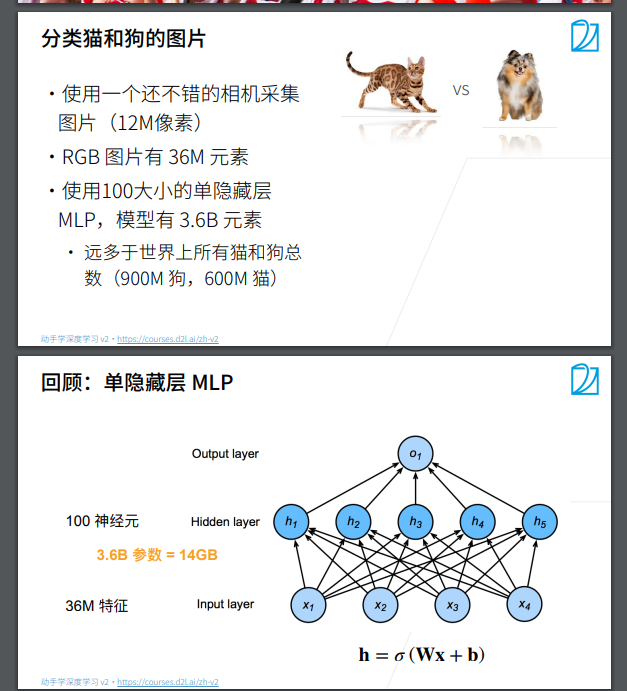
用全连接层的方式处理，权重过多了，比所有猫＋狗的总数都多
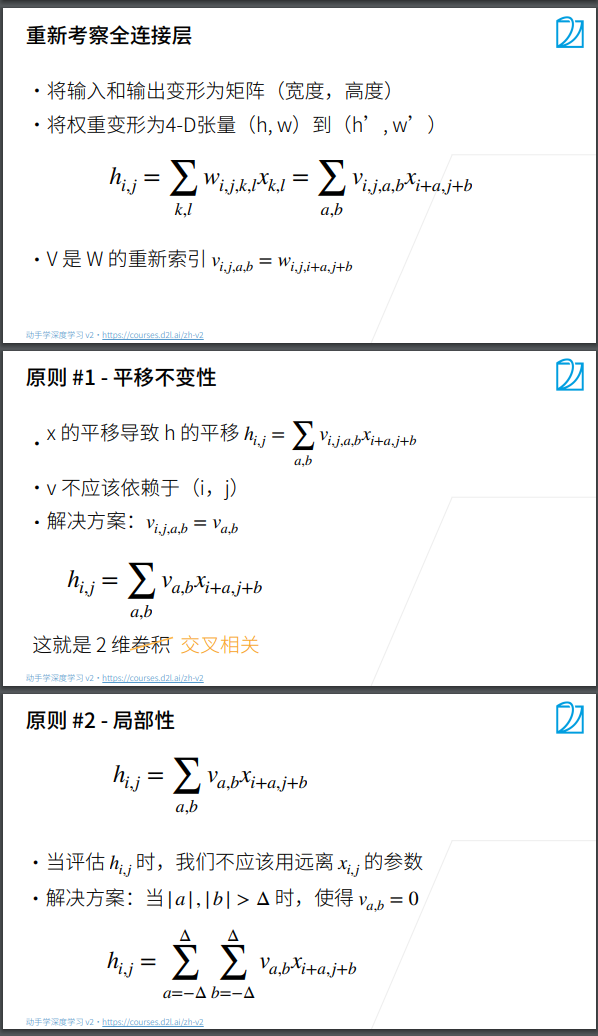
和ij无关也就是输入像素点的位置不会改变卷积核v的数值，所以可以降维

平移不变性（translation invariance）：不管检测对象出现在图像中的哪个位置，神经网络的前面几层应该对相同的图像区域具有相似的反应，即为“平移不变性”。

局部性（locality）：神经网络的前面几层应该只探索输入图像中的局部区域，而不过度在意图像中相隔较远区域的关系，这就是“局部性”原则。最终，可以聚合这些局部特征，以在整个图像级别进行预测。
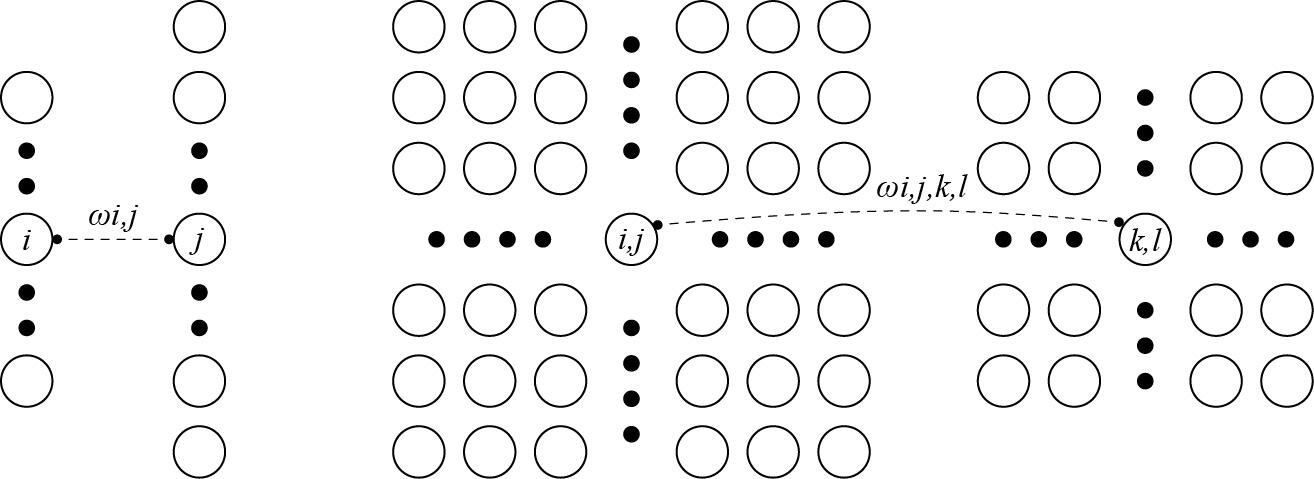
这里画反了 左边是k、l右边是i、j 但是就是这么个意思

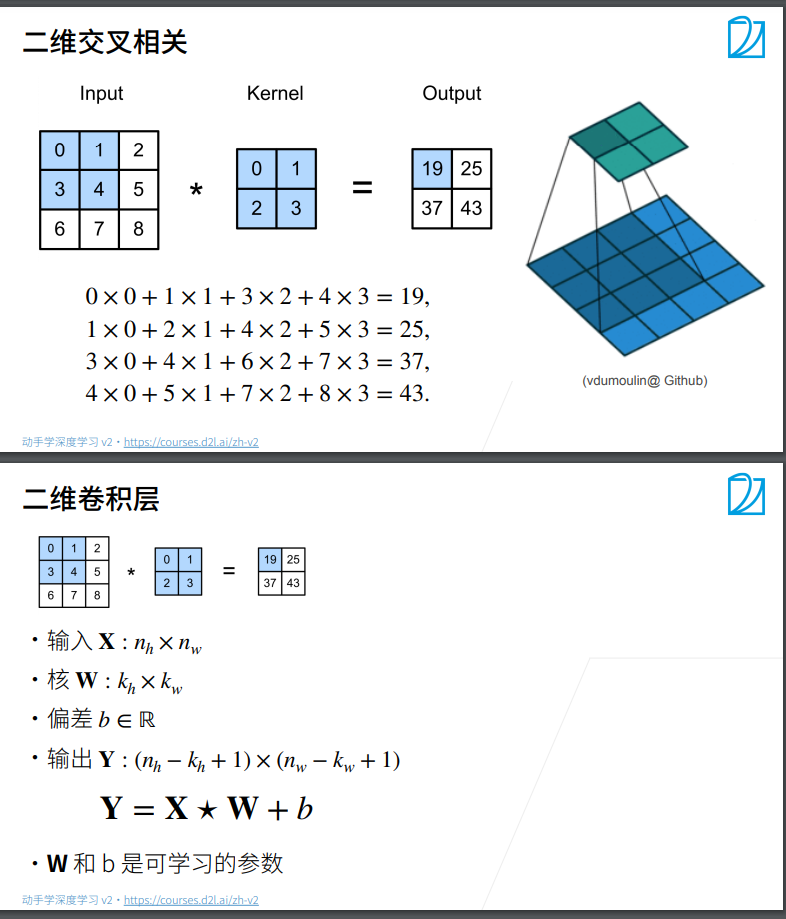
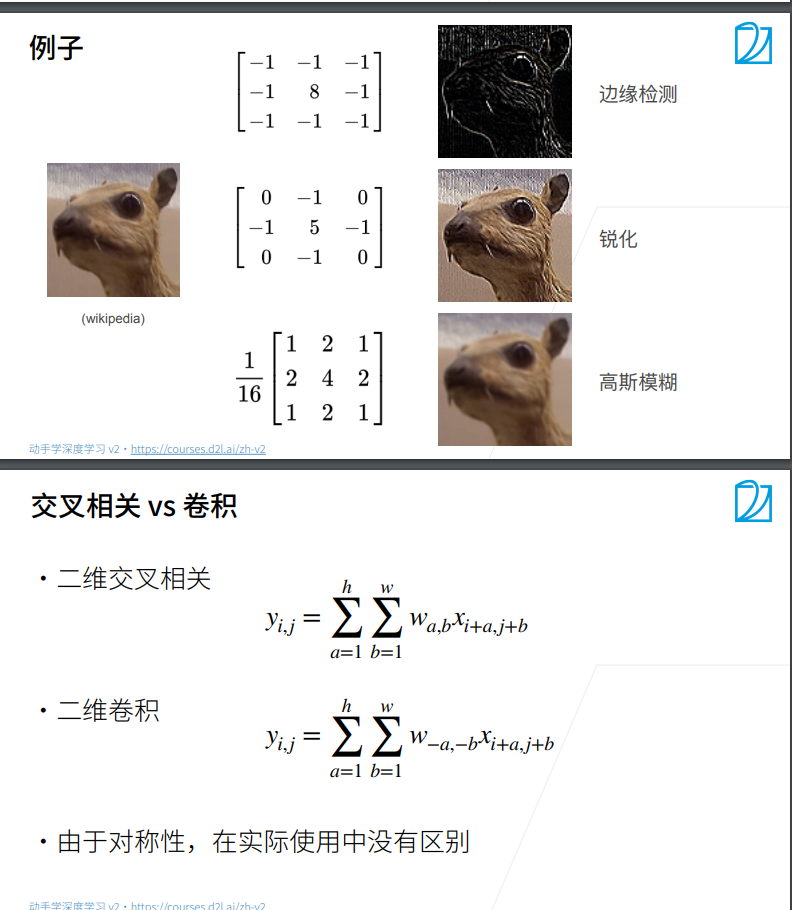
实际中我们算的其实是交叉相关
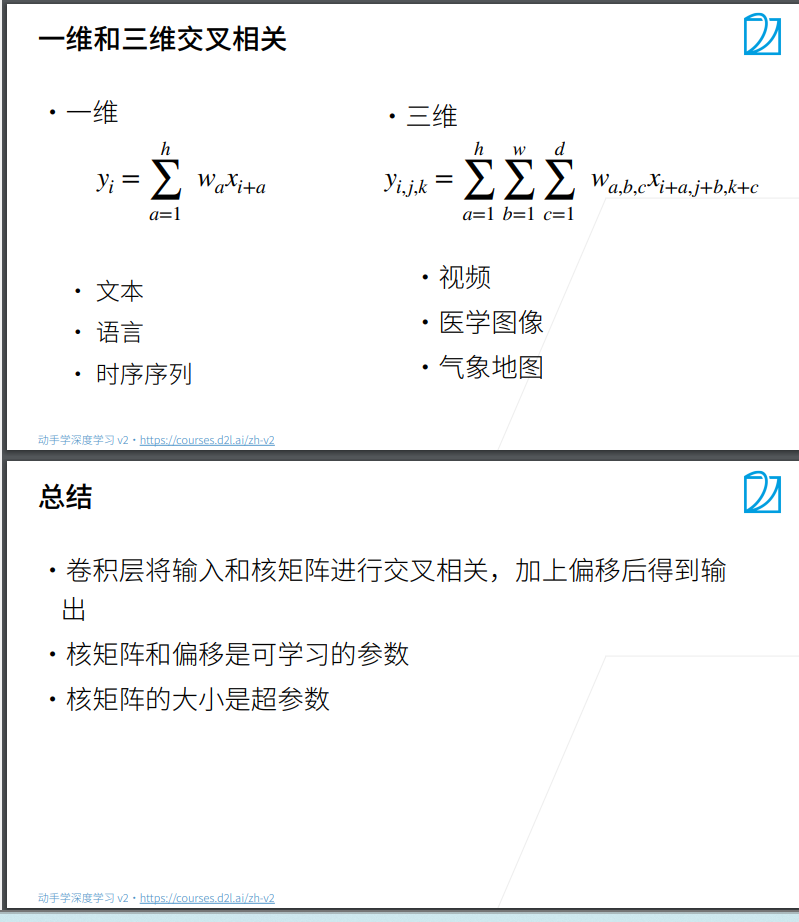
也有一维 三维的卷积核  CNN网络

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

def corr2d(X,K):
    h,w = K.shape
    Y = torch.zeros(X.shape[0]-h+1,X.shape[1]-w+1)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i,j] = (X[i:i+h,j:j+w] * K).sum() # 输出结果的坐标对应着输入计算时卷积核左上角坐标
    return Y

In [2]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

In [3]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weigth = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))
    def forward(self,x):
        return corr2d(x,self.weight)+self.bias # 外部的函数能直接被类内调用
        

In [4]:
X = torch.ones(6,8)
X[:,2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [15]:
K = torch.tensor([1.0,-1]).reshape(1,-1)
K

tensor([[ 1., -1.]])

In [16]:
Y = corr2d(X, K)
Y # 边缘检测

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [18]:
corr2d(X.T,K) # 横向的边缘检测不到

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [29]:
conv2d = nn.Conv2d(1,1,kernel_size=(1,2),bias=False) # 输入一个通道 输出一个通道
X = X.reshape((1,1,6,8)) # 第一个是batch 第二个是通道
Y = Y.reshape((1,1,6,7))
trainer = torch.optim.SGD(conv2d.parameters(),lr=0.03)
loss = nn.MSELoss(reduction='sum')
for i in range(10):
    Y_hat = conv2d(X)
    output = loss(Y_hat, Y)
    trainer.zero_grad()
    output.backward()
    trainer.step()
    if (i+1) % 2 == 0:
        print(f'batch{i+1}, loss{output:.3f}')

batch2, loss12.668
batch4, loss2.159
batch6, loss0.376
batch8, loss0.069
batch10, loss0.014


In [30]:
# 构造一个二维卷积层，它具有1个输出通道和形状为（1，2）的卷积核
conv2d = nn.Conv2d(1,1, kernel_size=(1, 2), bias=False)

# 这个二维卷积层使用四维输入和输出格式（批量大小、通道、高度、宽度），
# 其中批量大小和通道数都为1
X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))
lr = 3e-2  # 学习率

for i in range(10):
    Y_hat = conv2d(X)
    l = (Y_hat - Y) ** 2
    conv2d.zero_grad()
    l.sum().backward()
    # 迭代卷积核
    conv2d.weight.data[:] -= lr * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'epoch {i+1}, loss {l.sum():.3f}')

epoch 2, loss 12.459
epoch 4, loss 2.673
epoch 6, loss 0.687
epoch 8, loss 0.213
epoch 10, loss 0.076


In [31]:
conv2d.weight.data.reshape((1, 2))  # 学一个卷积层的权重 已经和1 -1很近了

tensor([[ 0.9566, -1.0104]])

### 填充和步幅
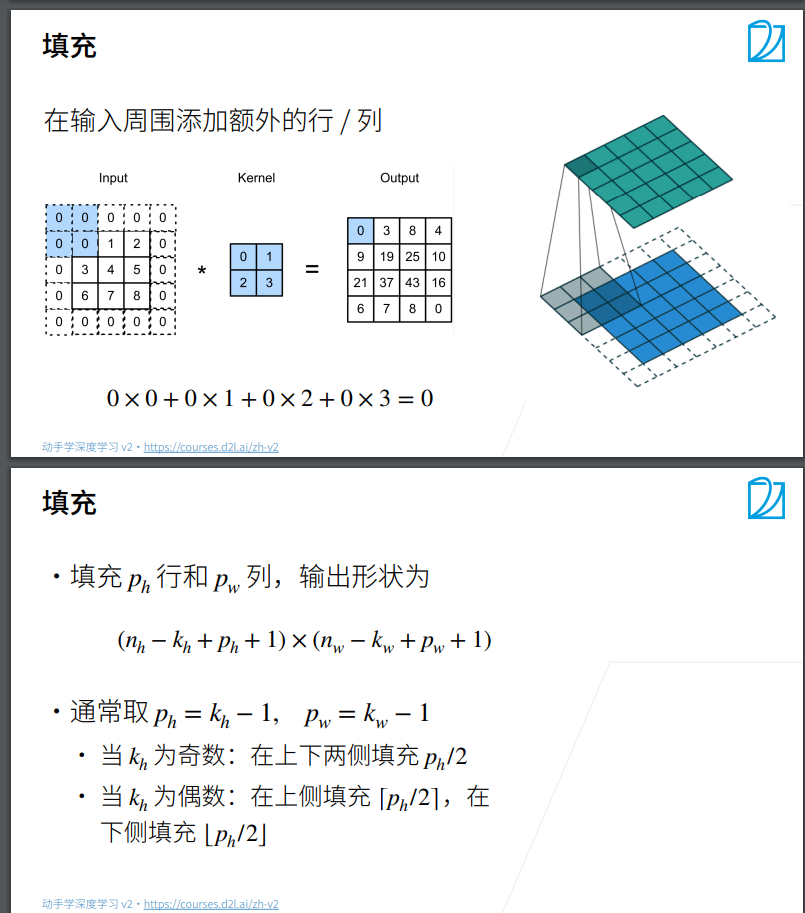 
注意这里填充上下 左右均为2，填充的多少是上加下 或者左加右

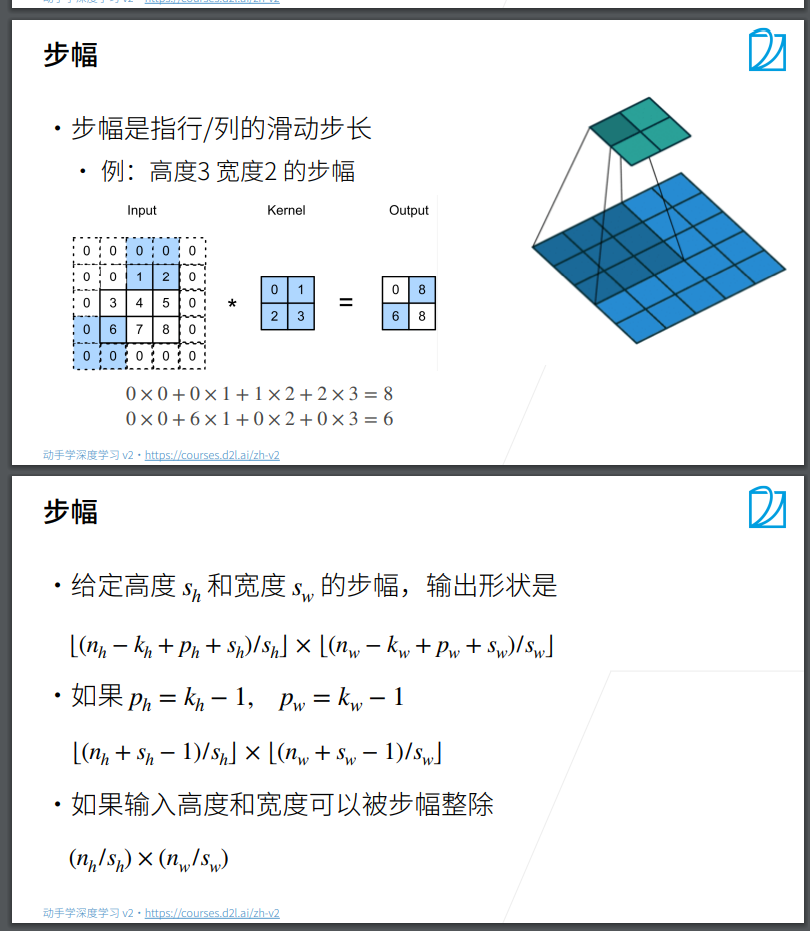

In [32]:
import torch
from torch import nn

def comp_conv2d(conv2d, X):
    X = X.reshape((1,1)+X.shape)
    Y = conv2d(X)
    return Y.reshape(Y.shape[2:])

conv2d = nn.Conv2d(1,1,kernel_size=3,padding=1) # 这里是所有侧边都填充1个像素的意思
# 计算公式里的ph pw应该是这个值的2倍
X = torch.rand(8,8)
comp_conv2d(conv2d,X).shape

torch.Size([8, 8])

In [33]:
conv2d = nn.Conv2d(1, 1, kernel_size=(5, 3), padding=(2, 1)) # （5-1）/2与 （3-1）/2
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [34]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)# （8-3+1*2+2）/2 向下取整
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [35]:
conv2d = nn.Conv2d(1, 1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape # 除了kerne_size其他都是＋

torch.Size([2, 2])

### 多个输入输出通道
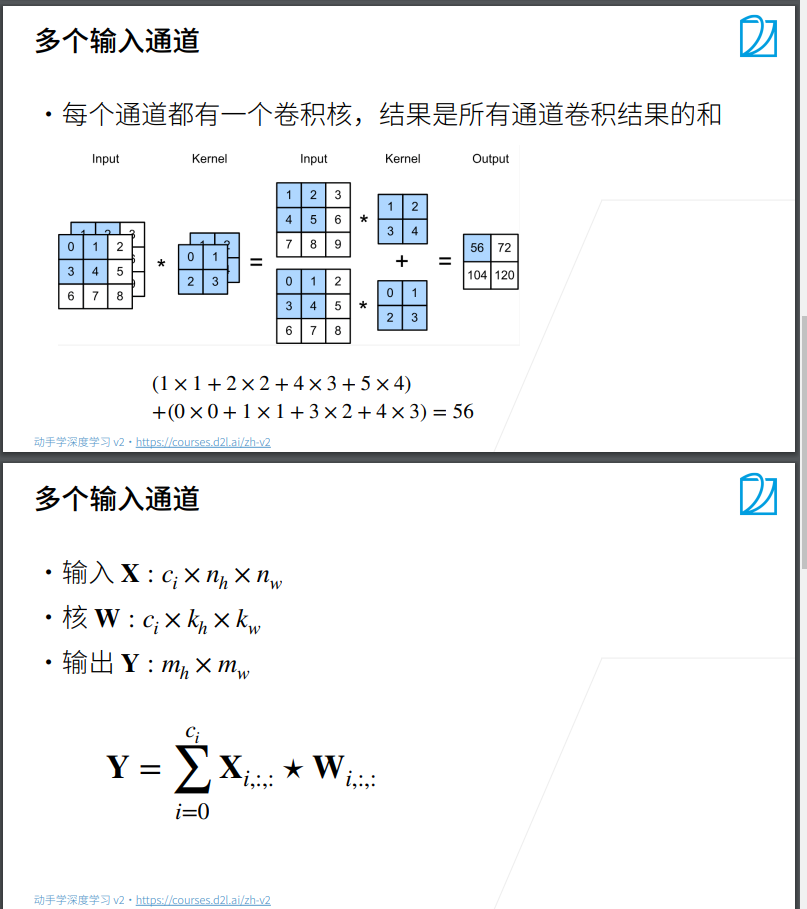
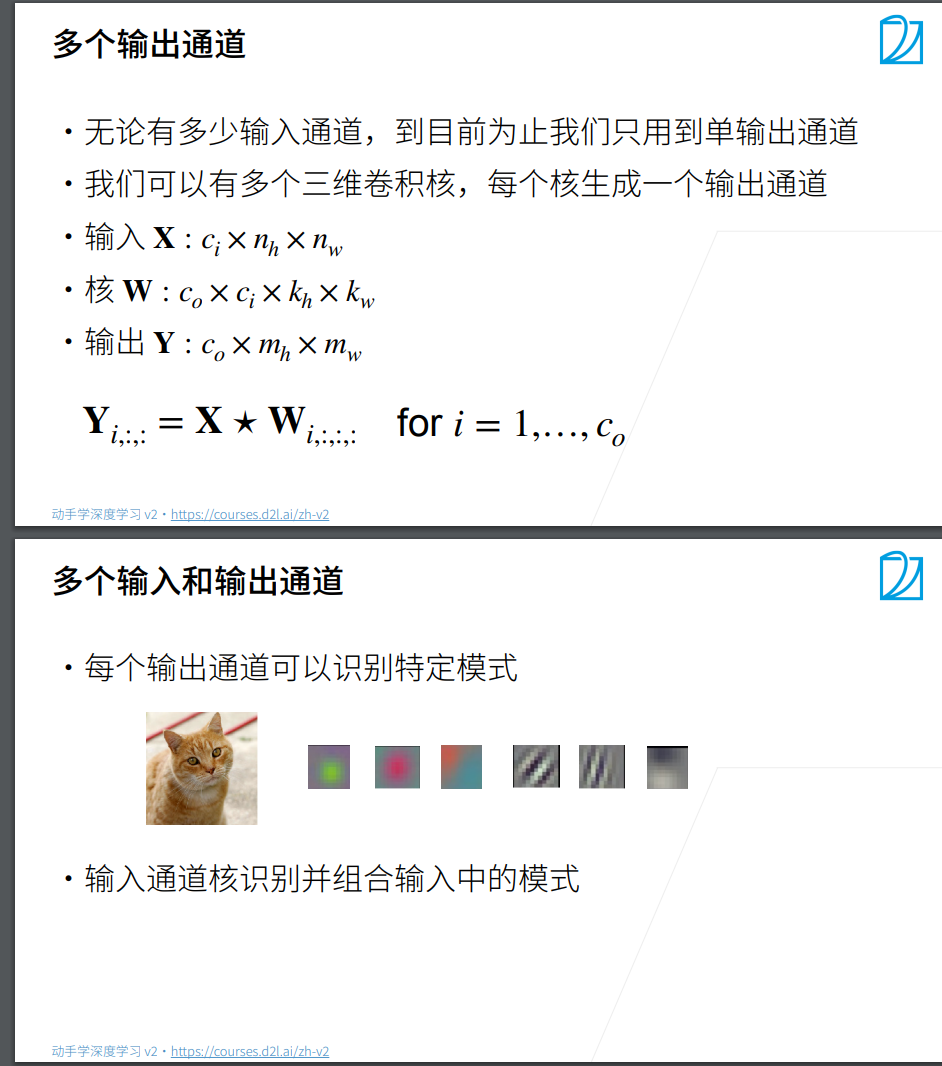
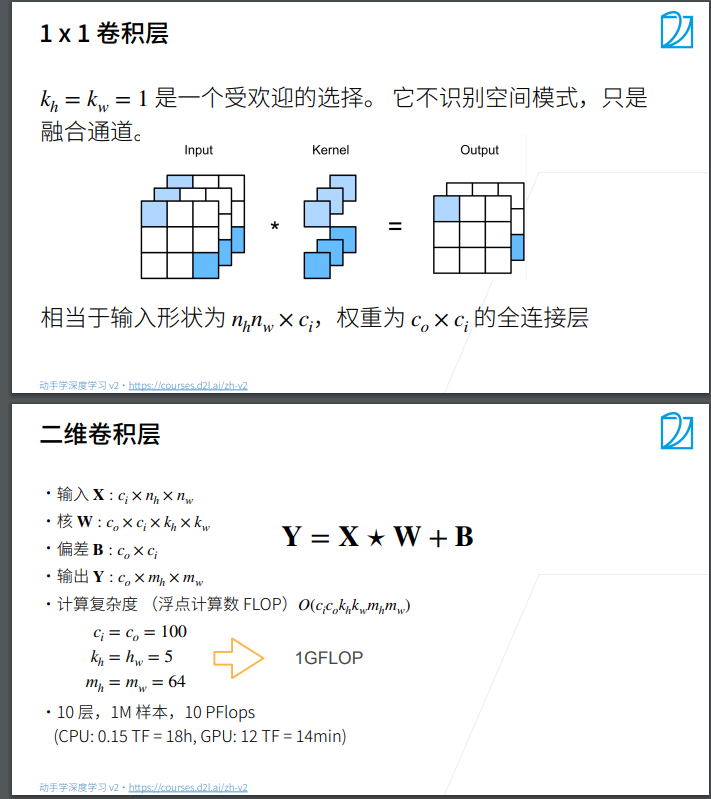

应该是大小维ci * co的全连接层，输入有ci个神经元 输出有co个神经元

一共有co*ci个卷积核 每个卷积核都有一个偏差。
**输出通道就是有多少组卷积核，输入通道就是每一组有多少个卷积核**

100* 100* 5* 5* 64* 64 * 10 * 1000000 / 1000000000000000 = 10PFlops

In [1]:
import torch
from d2l import torch as d2l

def corr2d_multi_in(X,K): # 3维的X和K
    return sum(d2l.corr2d(x,k) for x,k in zip(X,K) )

In [2]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K) # 两次卷积得到的结果又相加了

tensor([[ 56.,  72.],
        [104., 120.]])

In [3]:
def corr2d_multi_in_out(X,K): # 3维的X和4维的K
    return torch.stack([corr2d_multi_in(X,k) for k in K],0) # 第0个维度上堆起来

In [4]:
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])
K1 = torch.stack((K, K + 1, K + 2), 0) # 在第0维插入这个维度
K_ = torch.stack((K, K + 1, K + 2), 1)
K1.shape, K_.shape

(torch.Size([3, 2, 2, 2]), torch.Size([2, 3, 2, 2]))

In [5]:
K_

tensor([[[[0., 1.],
          [2., 3.]],

         [[1., 2.],
          [3., 4.]],

         [[2., 3.],
          [4., 5.]]],


        [[[1., 2.],
          [3., 4.]],

         [[2., 3.],
          [4., 5.]],

         [[3., 4.],
          [5., 6.]]]])

In [6]:
K

tensor([[[0., 1.],
         [2., 3.]],

        [[1., 2.],
         [3., 4.]]])

In [7]:
K1

tensor([[[[0., 1.],
          [2., 3.]],

         [[1., 2.],
          [3., 4.]]],


        [[[1., 2.],
          [3., 4.]],

         [[2., 3.],
          [4., 5.]]],


        [[[2., 3.],
          [4., 5.]],

         [[3., 4.],
          [5., 6.]]]])

In [8]:
corr2d_multi_in_out(X, K1)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

In [11]:
K1.reshape(2,2,2,3)

tensor([[[[0., 1., 2.],
          [3., 1., 2.]],

         [[3., 4., 1.],
          [2., 3., 4.]]],


        [[[2., 3., 4.],
          [5., 2., 3.]],

         [[4., 5., 3.],
          [4., 5., 6.]]]])

In [26]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape(c_i,h*w) # 应该是h*w个样本 每个样本ci个特征
    K = K.reshape(c_o,c_i)
    Y = torch.matmul(K, X)
    return Y.reshape(c_o,h,w)

X = torch.normal(0,1,(3,3,3))
K = torch.normal(0,1,(2,3,1,1))

Y1=corr2d_multi_in_out_1x1(X,K)
Y2 = corr2d_multi_in_out(X, K)
assert float(torch.abs(Y1-Y2).sum()) < 1e-6
Y1,Y2

(tensor([[[ 0.7501,  0.4247,  1.4710],
          [ 0.0403, -0.6402, -2.0763],
          [ 0.7156, -0.4417,  2.2347]],
 
         [[ 0.8169,  0.2994,  0.1060],
          [-0.4444, -0.6628, -1.1670],
          [ 0.9664,  1.7086,  1.8540]]]),
 tensor([[[ 0.7501,  0.4247,  1.4710],
          [ 0.0403, -0.6402, -2.0763],
          [ 0.7156, -0.4417,  2.2347]],
 
         [[ 0.8169,  0.2994,  0.1060],
          [-0.4444, -0.6628, -1.1670],
          [ 0.9664,  1.7086,  1.8540]]]))

In [29]:
def corr2d_multi_in_out_1x1_(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape(c_i,h*w).T# 应该是h*w个样本 每个样本ci个特征
    K = K.reshape(c_o,c_i).T # 要注意这里和平时的线性层是不一样的 这里进行了一个转置
    Y = torch.matmul(X, K).T
    return Y.reshape(c_o,h,w)

X = torch.normal(0,1,(3,3,3))
K = torch.normal(0,1,(2,3,1,1))

Y1=corr2d_multi_in_out_1x1_(X,K)
Y2 = corr2d_multi_in_out(X, K)
Y3 = corr2d_multi_in_out_1x1(X, K)
# assert float(torch.abs(Y1-Y2).sum()) < 1e-6
Y1,Y2,Y3

(tensor([[[-0.4831,  0.1861, -2.9784],
          [-2.0952, -2.5310,  1.9975],
          [-2.7782,  3.2584,  1.8582]],
 
         [[ 0.1094, -0.3528,  4.9883],
          [ 2.2500,  3.7431, -1.8053],
          [ 1.6196, -0.5030, -2.2952]]]),
 tensor([[[-0.4831,  0.1861, -2.9784],
          [-2.0952, -2.5310,  1.9975],
          [-2.7782,  3.2584,  1.8582]],
 
         [[ 0.1094, -0.3528,  4.9883],
          [ 2.2500,  3.7431, -1.8053],
          [ 1.6196, -0.5030, -2.2952]]]),
 tensor([[[-0.4831,  0.1861, -2.9784],
          [-2.0952, -2.5310,  1.9975],
          [-2.7782,  3.2584,  1.8582]],
 
         [[ 0.1094, -0.3528,  4.9883],
          [ 2.2500,  3.7431, -1.8053],
          [ 1.6196, -0.5030, -2.2952]]]))

In [30]:
X = torch.normal(0,1,(3,3,3))
X,X.reshape(3,9),X.reshape(9,3).T # 不一样的

(tensor([[[ 0.5739,  1.1845, -0.0491],
          [ 0.7886,  0.8542,  1.2176],
          [-1.1317, -0.5608,  2.5092]],
 
         [[ 0.1598,  0.9760, -0.0629],
          [-2.6811, -0.4620,  0.2880],
          [ 0.3132,  1.1714,  1.1038]],
 
         [[ 1.4907, -2.0024, -0.2286],
          [ 0.7924,  0.4454, -1.8407],
          [-0.6725, -2.1735,  1.4288]]]),
 tensor([[ 0.5739,  1.1845, -0.0491,  0.7886,  0.8542,  1.2176, -1.1317, -0.5608,
           2.5092],
         [ 0.1598,  0.9760, -0.0629, -2.6811, -0.4620,  0.2880,  0.3132,  1.1714,
           1.1038],
         [ 1.4907, -2.0024, -0.2286,  0.7924,  0.4454, -1.8407, -0.6725, -2.1735,
           1.4288]]),
 tensor([[ 0.5739,  0.7886, -1.1317,  0.1598, -2.6811,  0.3132,  1.4907,  0.7924,
          -0.6725],
         [ 1.1845,  0.8542, -0.5608,  0.9760, -0.4620,  1.1714, -2.0024,  0.4454,
          -2.1735],
         [-0.0491,  1.2176,  2.5092, -0.0629,  0.2880,  1.1038, -0.2286, -1.8407,
           1.4288]]))

In [34]:
K,K.reshape(3,2),K.reshape(2,3)

(tensor([[[[-0.9362]],
 
          [[-0.8337]],
 
          [[ 0.3667]]],
 
 
         [[[ 0.2880]],
 
          [[ 1.7413]],
 
          [[-0.7717]]]]),
 tensor([[-0.9362, -0.8337],
         [ 0.3667,  0.2880],
         [ 1.7413, -0.7717]]),
 tensor([[-0.9362, -0.8337,  0.3667],
         [ 0.2880,  1.7413, -0.7717]]))

    X = X.reshape(c_i,h*w).T# 应该是h*w个样本 每个样本ci个特征
    K = K.reshape(c_o,c_i).T # 要注意这里和平时的线性层是不一样的 这里进行了一个转置
为什么会这样？ 平时的线性层应该是(h*w,c_i)和（c_i,c_o）。这里和reshape的原理有关。reshape的顺序是一个个矩阵来的，一个矩阵从左到右从上到下结束以后，才会是下一个矩阵。现在X是3个3 *3的矩阵，一个矩阵就是一个channel，那么应该变成3 *9的矩阵否则9 *3的话就会导致1-3的通道实际上都是第一个通道的值，然后在第二个通道的值。全部打乱了。所以应该有转置。这之后相乘变成一个9 *2的Y注意输出应该是一个channel里面一个3 *3那么应该先转置2 *9再reshape

总结：reshape是从左到右从上到下的，应该先变成有意义的形状再reshape。1*1的卷积层可以看做是一个转置以后的线性层

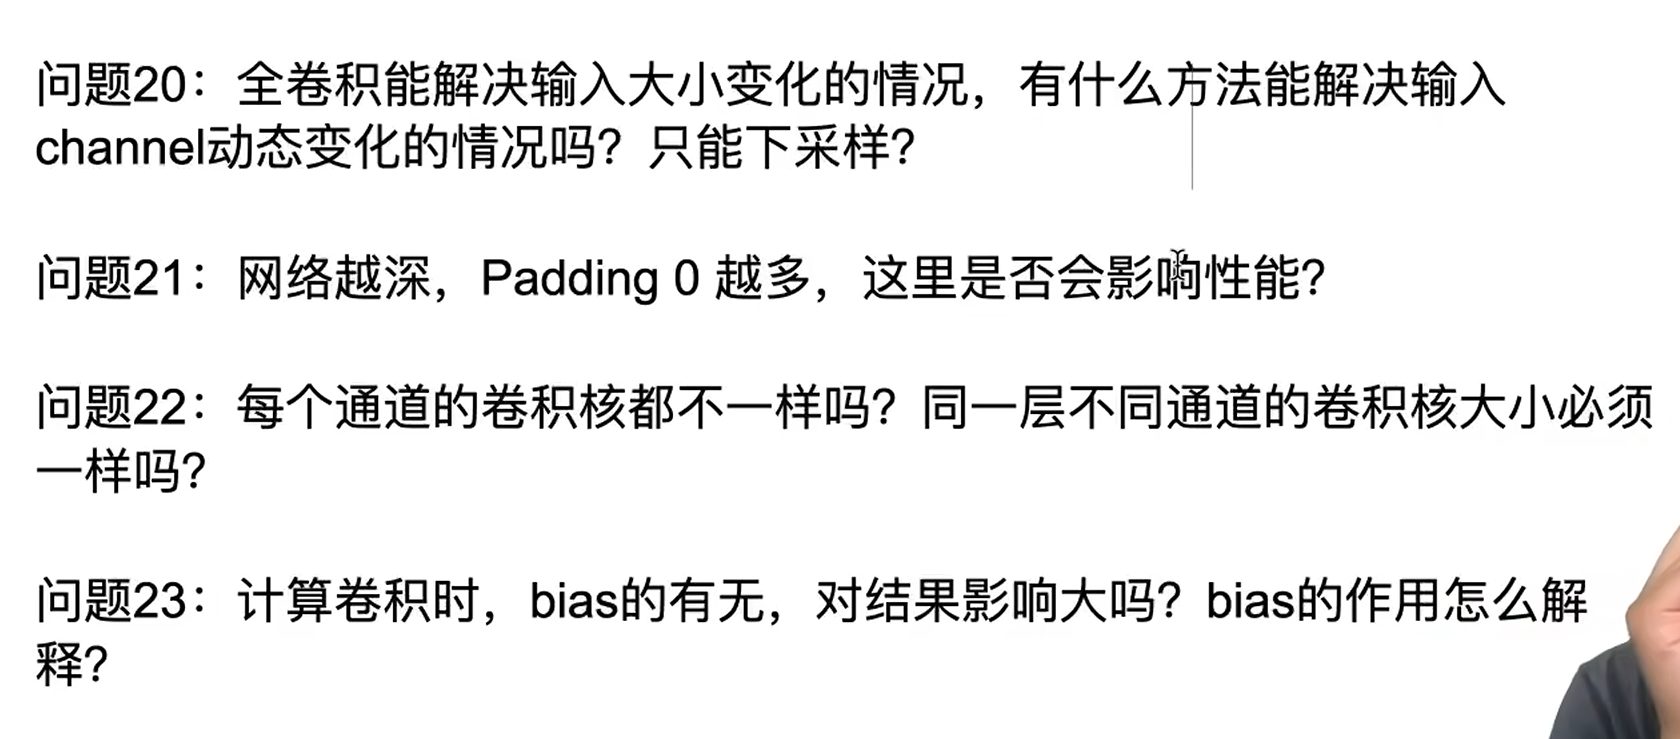
输入的高宽变小，通常通道数要加一倍，保存更多的信息

padding0不太会影响性能 可以看作是多一个常数影响不大，稍微复杂一点点（计算性能）。模型性能也影响不大，0不对结果有太大影响

同一个通道的卷积核是不同的，不同的通道卷积核是相同的。个人认为是同一个通道面对不同组（c0组）的卷积核，每一组侧重的不同，所以是不同的。“不同通道的卷积核是一样的”，其实是不同通道的同一个输出通道的卷积核是一样的

bias有无影响不大。可以看做是对数据的一个中心化（减去数据的均值）

## 池化
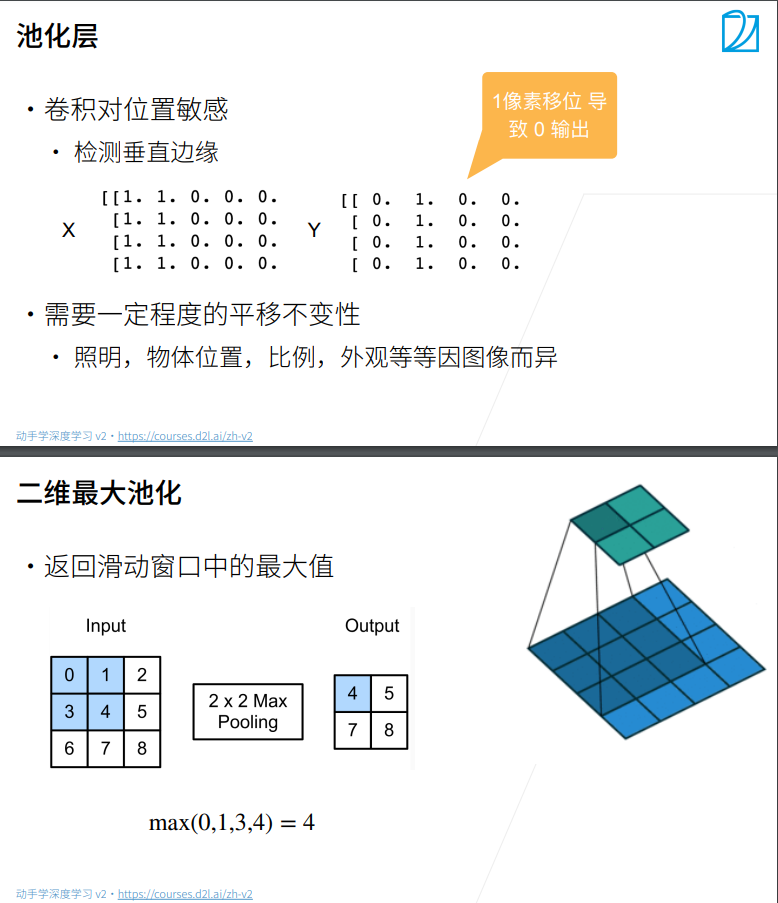
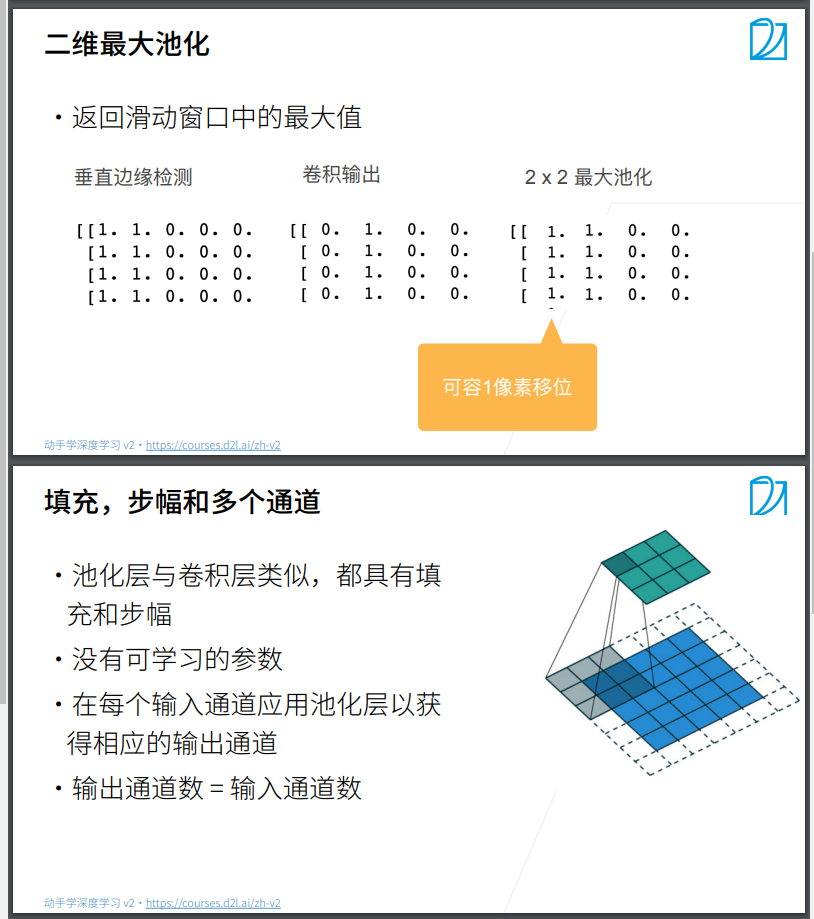
池化结果错了 应该是110 ，110， 110
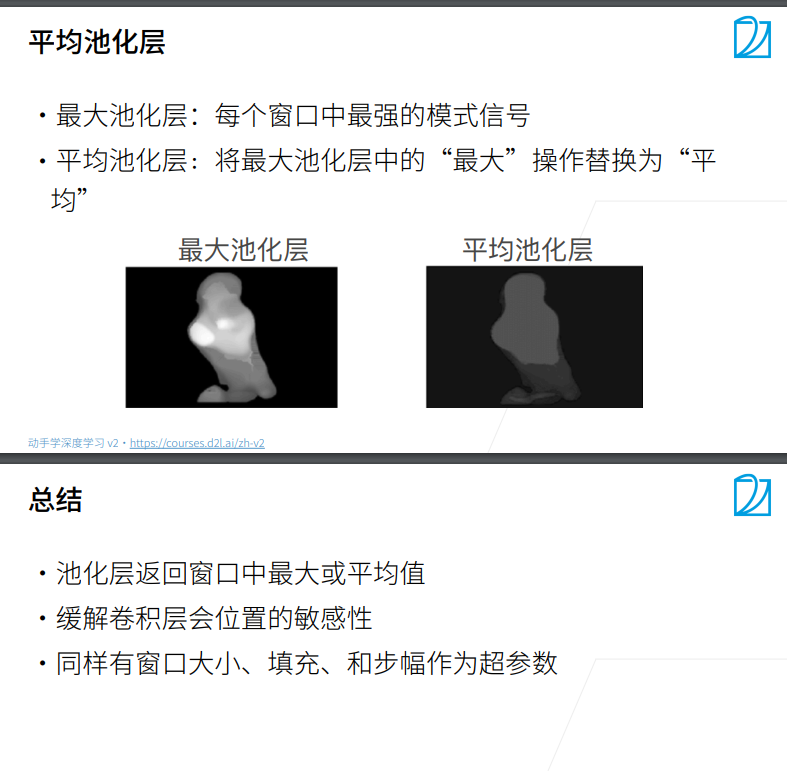
它具有双重目的：降低卷积层对位置的敏感性（不然图片稍微便宜 边缘信息就变化了 希望变化不大），同时降低对空间降采样表示的敏感性。同时还能减少计算量stride为2时。

现在池化不太用了，首先是会做数据增强，不断转动图片，使得网络本来就减少位置的敏感性防止对位置过拟合。同时卷积层stride较大也能减少运算量。

输入通道等于输出通道 对于通道不会改变什么

In [36]:
import torch
from torch import nn
from d2l import torch as d2l

def pool2d(X, *pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1)) # 对原来矩阵的长宽影响是-p+1
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [38]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, 2, 2) # （2,2）会报错

tensor([[4., 5.],
        [7., 8.]])

In [40]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, 2, 2,mode = 'avg')# （2,2）会报错

tensor([[2., 3.],
        [5., 6.]])

In [41]:
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [42]:
pool2d = nn.MaxPool2d(3) # 在pytorch中默认池化窗口=步幅
pool2d(X)

tensor([[[[10.]]]])

In [43]:
pool2d = nn.MaxPool2d(3,stride=1)
pool2d(X)

tensor([[[[10., 11.],
          [14., 15.]]]])

In [45]:
pool2d = nn.MaxPool2d(3,stride=2,padding=1)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [46]:
pool2d = nn.MaxPool2d((2, 3), stride=(2, 3), padding=(0, 1))
pool2d(X)  
# 这个运算后的矩阵大小计算公式和卷积层是相同的(hw-kw+stride+padding*2)/stride的向下取整

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [51]:
# stack增加维度，cat在当前维度上连接
X_cat = torch.cat((X, X + 1), 1) # 在第2个维度上链接
X_cat,X_cat.shape

(tensor([[[[ 0.,  1.,  2.,  3.],
           [ 4.,  5.,  6.,  7.],
           [ 8.,  9., 10., 11.],
           [12., 13., 14., 15.]],
 
          [[ 1.,  2.,  3.,  4.],
           [ 5.,  6.,  7.,  8.],
           [ 9., 10., 11., 12.],
           [13., 14., 15., 16.]]]]),
 torch.Size([1, 2, 4, 4]))

In [50]:
X_stack = torch.stack((X, X + 1), 1)
X_stack,X_stack.shape

(tensor([[[[[ 0.,  1.,  2.,  3.],
            [ 4.,  5.,  6.,  7.],
            [ 8.,  9., 10., 11.],
            [12., 13., 14., 15.]]],
 
 
          [[[ 1.,  2.,  3.,  4.],
            [ 5.,  6.,  7.,  8.],
            [ 9., 10., 11., 12.],
            [13., 14., 15., 16.]]]]]),
 torch.Size([1, 2, 1, 4, 4]))

In [52]:
torch.cat((X, X + 1), 0) # 在第0个维度链接

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]],


        [[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [54]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X_cat)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

In [57]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X_stack) # 维度太高会报错 请用3d池化

RuntimeError: non-empty 3D or 4D (batch mode) tensor expected for input

### 卷积层
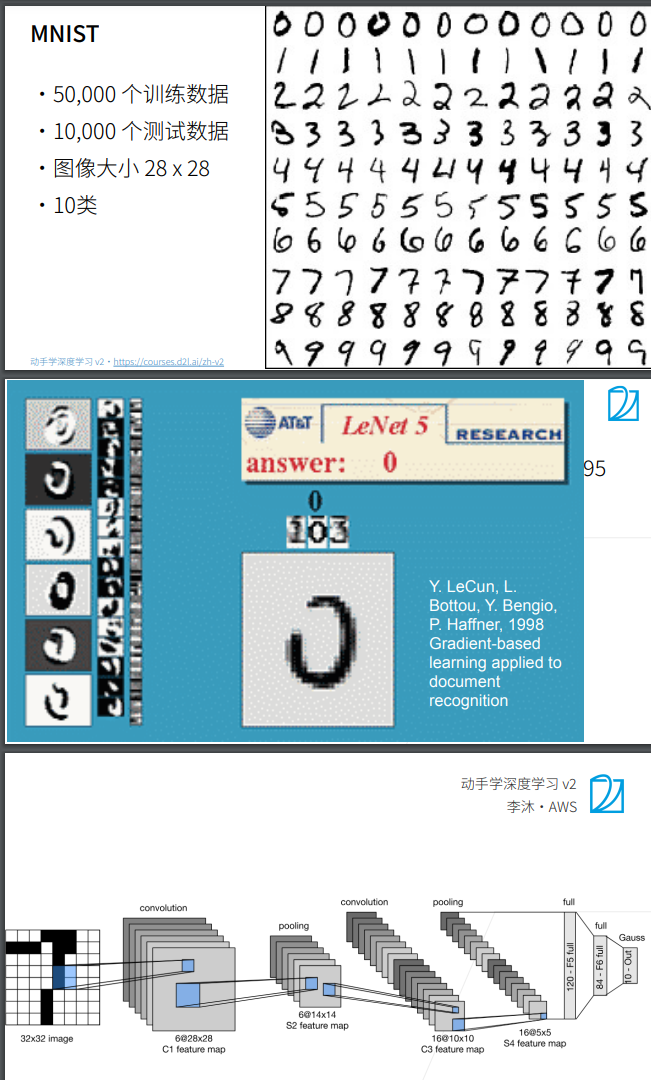
矩阵大小不断变小，通道不断增多（也就是pattern增多）

In [40]:
''' 如果新形状满足view函数所要求的条件(即基于不变的内存数据仍能以固定的新步幅访问该数据)，
那么这时候reshape()跟view()等价，不会复制一份新的数据。
如果新的形状不满足view函数所要求的条件(即无法求得满足条件的新步幅)，这时候reshape也能工作，
这时候它会将原来非连续性的tensor按逻辑顺序copy到新的内存空间(即使得要使用view函数的tensor b其逻辑数据顺序和物理数据顺序一致)，然后再改变tensor b形状。
'''
import torch
from torch import nn
from d2l import torch as d2l
A = torch.arange(16).view(1,1,4,4)

In [2]:
A

tensor([[[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11],
          [12, 13, 14, 15]]]])

In [41]:
class Reshape(nn.Module):
    def forward(self, x):
        return x.view(-1,1,28,28)

net = nn.Sequential(Reshape(),nn.Conv2d(1,6,5,padding=2),nn.Sigmoid()
                    ,nn.AvgPool2d(2)
                    ,nn.Conv2d(6,16,5)
                    ,nn.Sigmoid()
                    ,nn.AvgPool2d(2)
                    ,nn.Flatten()
                    ,nn.Linear(16*5*5,120)
                    ,nn.Sigmoid()
                    ,nn.Linear(120,84)
                    ,nn.Sigmoid()
                    ,nn.Linear(84,10)
                    ,nn.Softmax()
                   )

In [12]:
X = torch.rand(1,1,28,28)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Reshape output shape:	 torch.Size([1, 1, 28, 28])
Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


In [13]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

In [17]:
a= list([1,2,3])
a, isinstance(a,(tuple,list))

([1, 2, 3], True)

In [37]:
def evaluate_accuracy_gpu(net, data_iter, device=None):
    if isinstance(net, nn.Module):
        net.eval()
        if not device:
            device = next(iter(net.parameters())).device
    metric = d2l.Accumulator(2)
    for X,y in data_iter:
        if isinstance(X, (list,tuple)):
            X = [x.to(device) for x in X]
        else:
            X = X.to(device)
        y = y.to(device)
        metric.add(d2l.accuracy(net(X),y),y.numel())
    return metric[0] / metric[1]



In [21]:
for layer in net:
    print(isinstance(layer,nn.Linear),type(layer) == nn.Linear,end='\t') # 这两个用法都可以的

False False	False False	False False	False False	False False	False False	False False	False False	True True	False False	True True	False False	True True	

In [32]:
layer = nn.Linear(100,10)
# nn.init.normal_(layer.weight)
layer.weight.data.uniform_() # 注意这里要取出data才能用normal_/ uniform_ 没有xavier

tensor([[0.9979, 0.5822, 0.6650, 0.5606, 0.5779, 0.6209, 0.2473, 0.6942, 0.4010,
         0.6115, 0.3487, 0.3409, 0.5722, 0.2230, 0.0025, 0.5415, 0.0037, 0.7566,
         0.8431, 0.2106, 0.4642, 0.7798, 0.4726, 0.7201, 0.5559, 0.2614, 0.6668,
         0.4095, 0.7158, 0.2765, 0.2088, 0.5641, 0.8936, 0.0058, 0.1922, 0.9198,
         0.6972, 0.5095, 0.5474, 0.4732, 0.0349, 0.1632, 0.8294, 0.8988, 0.8462,
         0.4080, 0.2289, 0.8348, 0.2947, 0.3863, 0.4146, 0.0582, 0.1013, 0.8177,
         0.5748, 0.3946, 0.4641, 0.4378, 0.7032, 0.3362, 0.6126, 0.2803, 0.2038,
         0.6382, 0.4334, 0.0037, 0.2218, 0.5826, 0.3317, 0.5189, 0.6965, 0.2876,
         0.4561, 0.1377, 0.6905, 0.9662, 0.0797, 0.2259, 0.4265, 0.5482, 0.8683,
         0.4335, 0.6528, 0.2131, 0.8546, 0.4032, 0.6577, 0.9934, 0.1276, 0.6192,
         0.5061, 0.4423, 0.4086, 0.6652, 0.2860, 0.3846, 0.1011, 0.9027, 0.5338,
         0.4326],
        [0.0085, 0.5212, 0.2850, 0.1233, 0.2727, 0.3721, 0.1942, 0.7595, 0.4156,
         0

In [38]:
#@save
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    """用GPU训练模型(在第六章定义)"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        # 训练损失之和，训练准确率之和，样本数
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')
            

对于relu的学习率一般都是要比sigmoid小的 因为sigmoid两端梯度太小。
若在网络中加入了softmax 那么更需要加大学习率 因为softmax可以看做是一种特殊的sigmoid
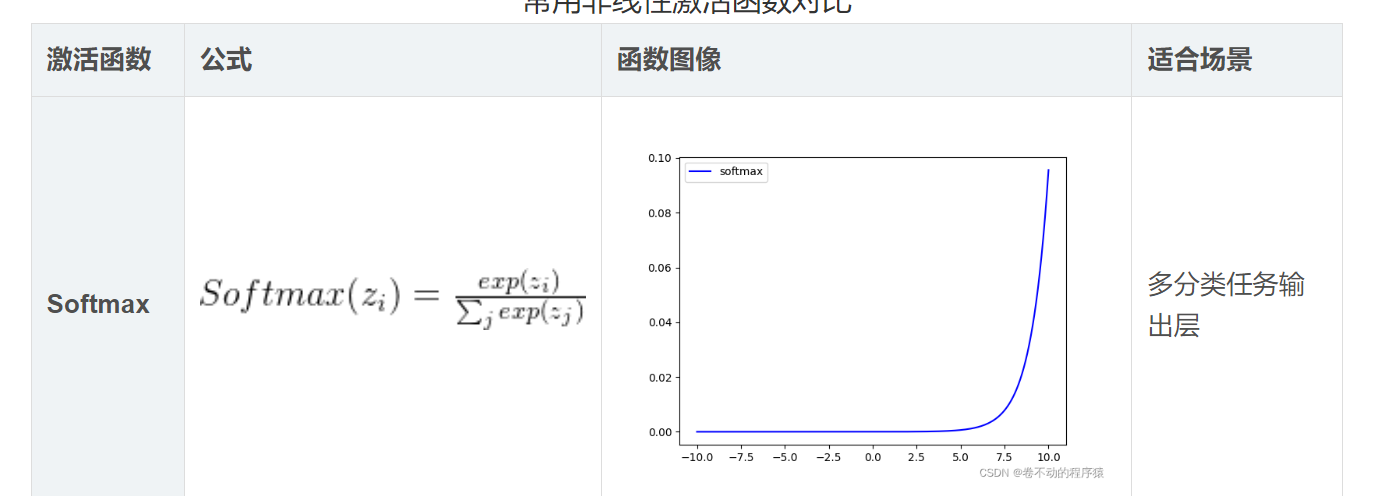

loss 0.470, train acc 0.822, test acc 0.797
56358.7 examples/sec on cuda:0


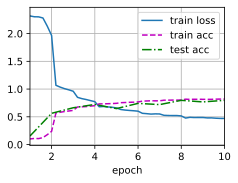

In [39]:
lr, num_epochs = 0.9, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())
# 一般来说模型大就容易过拟合

loss 1.952, train acc 0.519, test acc 0.525
57249.5 examples/sec on cuda:0


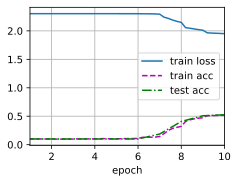

In [42]:
lr, num_epochs = 0.9, 10  # 这个和下面加了softmax 上面那个没有加
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())
# 一般来说模型大就容易过拟合

loss 1.712, train acc 0.755, test acc 0.744
53093.1 examples/sec on cuda:0


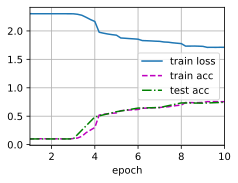

In [44]:
lr, num_epochs = 1.5, 10  
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())
# 一般来说模型大就容易过拟合